## GSIDIAG

>O pacote _GSIDIAG_ foi concebido para ser uma ferramenta que possibilita o fácil acesso aos arquivos diagnósticos gerados pelo [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). O pacote é composto principalmente por 2 classes, a primiera para ler os dados (**read_diag**) e outra para fazer diferentes tipos de figuras com dados selecionados (**plot_diag**).

### read_diag

>A classe read_diag é composta por 5 funções:

>1) \__init\__(self, diagFile, diagFileAnl=None, isisList=None, zlevs=None)

>>Sendo diagFile o arquivo diagnóstico do primiero outer loop com informação do OmF e diagFileAnl do último outer loop com informação do OmA. Note que não é necessário informar os dois arquivos, o diagFileAnl é opcional. Neste caso, a informação lida (Omf ou OmA) dependerá do outer loop (arquivo diagnóstico) fornecido.

>2) overview(self)

>>Esta função cria e retorna um dicionário com as informações existentes no arquivo.

>3) pfileinfo(self)

>>Esta função imprime de forma elegante uma lista com as informações existentes no arquivo.

>4) close(self)

>>Esta função fecha o último arquivo aberto.

>5) tocsv(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", Level=None, Lay = None, SingleL=None)

>>Esta função gera um arquivo CSV dos parâmetros OmF e OmA com as seguintes informações: Data, média, desvio-padrão e total de dados para a variável e tipo escolhidos.
    
>>Os dados de entrada da função e funcionalidades são idênticas àquelas da função time_series que é apresentada na próxima seção na clase plot_diag (item 7 - ver também detalhes das funcionalidades [aqui](#time_series))). O que distingue as duas funções é que esta escreve um arquivo CSV e a outra gera figuras de séries temporais. 


### plot_diag
    
>A classe plot_diag é composta por 7 funções:

>1) plot(self, varName, varType, param, mask=None, **kwargs)

>>A função plot gera uma figura para a variável varName (ex: "uv"), varType (ex: 220 (Dropssonda)) e param, que pode ser várias opções como: param="obs" para o valor da observação, param="omf" para observação menos background ou param="oma" para observação menos análise. Também é possivel mascarar os dados com a variável iuse, que indica se o dado foi (iuse=1) ou não (iuse=-1 - dado monitorado) utilizado na assimilação. Abaixo tem um exemplo executado para varName="uv", varType=220, param="obs" e mask="iuse == 1".

<img src=notefigs/uv_obs_plot.png style="width: 800px;">
<br>

>2) ptmap(self, varName, varType=None, mask=None, **kwargs)

>>A função ptmap gera uma figura com a localização de todas as observações definidas por varName (ex: "uv") e varType (pode ser um único tipo ou uma lista, ex: [200] ou [220,221,257]. Se varType não for informado, então todos os tipos serão incluídos na figura. Também é possivel mascarar os dados com a variável iuse, que indica se o dado foi (iuse=1) ou não (iuse=-1 - dado monitorado) utilizado na assimilação. Abaixo tem um exemplo executado para varName="uv", varType=[254,242,221,220,257,258,281,280] e mask=None. 

<img src=notefigs/uv_254_242_221_220_257_258_281_280_ptmap.png>
<br>

>3) pvmap(self, varName=None, mask=None, **kwargs)

>>A função pvmap é similar à função ptmap, com a diferença de não especificar o tipo (varType), podendo então escolher uma lista de variáveis, ex: ["uv","ps""t"]. Abaixo tem um exemplo executado para varName=['uv','ps','t'], e mask=None. 

<img src=notefigs/uv_ps_t_pvmap.png style="width: 800px;">
<br>

>4) pcount(self,varName,**kwargs)

>>A função pcount gera um histograma da quantidade de dados para uma determinada variável (varName, ex: "uv") e todos os tipos disponíveis (varType).

<img src=notefigs/uv_pcount.png style="width: 800px;">
<br>

>5) kxcount(self,**kwargs)

>>A função kxcount é similar à pcount, porém não especifica a variável (varName). Esta função gera um histograma com o total de dados (todas as variáveis somadas) para todos os tipos disponíveis (varType).

<img src=notefigs/kxcount.png style="width: 800px;">
<br>
    
>6) vcount(self,**kwargs)

>>A função vcount gera um histograma com a quantidade total de dados para cada variável (ps, t, q, uv).
    
<img src=notefigs/vcount.png style="width: 800px;">
<br>

>7) time_series(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, Level=None, Lay = None, SingleL=None, Clean=None)

>>A função time_series pode gerar 6 tipos distintos de figuras, dependendo da configuração especificada na sua chamada. A característica comum entre os 6 tipos é a variação no tempo, enquanto que a diferença entre os 6 tipos é a forma de tratar os níveis verticais. Basicamente estas formas são distribuidas entre variar na vertical (diferentes valores para diferentes níveis/camandas) e fixo na vertical (nível específico, média na camada ou toda a atmosfera). A seguir são paresentadas os parâmetros de entrada na função e cada uma das opções de figuras será explicada em mais detalhes.
    

| Parâmetro     | Exemplo       | &emsp;Descrição
| :---          | :---:         | :---
| self          | ["/home/user/diag_conv_01.2019121000"]              | &emsp;_Lista com todos os caminhos completos (caminho/nome_do_arquivo) <br /> &emsp;de cada tempo da série temporal._             
| varName       | "uv"          | &emsp;_Nome da variável_   
| varType       | 220           | &emsp;_Tipo da variável_
| dateIni       | "2019121000"  | &emsp;_Data inicial da série temporal_
| dateFin       | "2019121118"  | &emsp;_Data final da série temporal_
| nHour         | "6"           | &emsp;_Intervalo de tempo em horas entre cada arquivo na lista self_
| vminOMA       | -2.0          | &emsp;_Valor mínimo da escala Y para OmF e OmA_
| vmaxOMA       | 2.0           | &emsp;_Valor máximo da escala Y para OmF e OmA_
| vminSTD       | 0.0           | &emsp;_Valor mínimo da escala Y para o desvio-padrão_
| vmaxSTD       | 14.0          | &emsp;_Valor máximo da escala Y para o desvio-padrão_
| Level         | "Zlevs"       | &emsp;_Valor do nível a ser feita a série temporal, opções: <br /> &emsp;Valor numérico referente ao nível, ex.: 1000 p/ 1000 hPa;<br /> &emsp;"Zlevs" para plot por camadas (em torno dos níveis padrões) <br /> &emsp;None para plot de todos os níveis._
| Lay           | 25            | &emsp;_Metade do tamanho da camada (se Level = "Zlevs") em hPa se optar por amostragem em camadas. </br > &emsp;Se Lay = None, Lay será calculada internamente para preencher toda a atmosfera contendo os níveis padrões._
| SingleL       | "All"         | &emsp;_Quando Level for fixo, ex: 1000 hPa, será considerado exatamente esse nível (usando a opção SingleL = None) ou; <br /> &emsp;Em todos os níveis como uma única camada (usando SingleL = "All") ou; <br /> &emsp;Em uma camada definida em torno do valor de Level variando entre Level-Lay e Level+Lay. <br /> &emsp;Se Lay não for informado, será usado um valor padrão de 50 hPa._ 
| Clean         | True or False | &emsp;_Se True, após gerar e salvar a figura, a janela da figura é reiniciada (plt.clf) ou fechada (plt.close), <br />&emsp;Se False, este procedimento é eliminado e a figura continua disponível para visualizaçao com plt.show()._ 

>>Todas as figuras geradas com a opção Level igual a None ou "Zlevs" terá no nome o termo _all_levels_, caso contrário será _level_ ou _layer_ dependendo da opção SingleL.

>No decorrer deste documento são mostrados exemplos com recortes de código para exemplificar o uso das funções expostas acima.


Importando o pacote gsidiag como gd. Também iremos precisar do pacote datetime para gerar a lista com datas e formar os caminhos e nomes dos aquivos para passar para a função time_series.

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

'**DIRdiag** = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

| Definição das variáveis utilizadas nos exemplos deste tutorial <br />(quando não especificada nenhuma alteração)| | Valores
| :---:        |:---: | :--- 
|**_varName_** |=   | **"uv"**    
|**_varType_** |=   | **220**         
|**_dateIni_** |=   | **"2019121000"**   
|**_dateFin_** |=   | **"2019121118"**   
|**_nHour_**   |=   | **"6"**            
|**_vminOMA_** |=   | **-2.0**        
|**_vmaxOMA_** |=   | **2.0**          
|**_vminSTD_** |=   | **0.0**   
|**_vmaxSTD_** |=   | **14.0**         
|**_Level_**   |=   | **1000**      
|**_Lay_**     |=   | **15**         
|**_SingleL_** |=   | **"OneL"**
                          
Gerando as datas para compor o caminho e nome dos arquivos de diagnóstico do GSI.                          

In [2]:
# Para uso na Egeon
DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso na Itapemirim (Colorado, Ilopolis e outras máquinas virtuais)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

varName = "uv"
varType = 220
dateIni="2019121000" 
dateFin="2019121118" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2019121000', '2019121006', '2019121012', '2019121018', '2019121100', '2019121106', '2019121112', '2019121118']


Gerando as variáveis path e pathc onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop.

In [3]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_conv_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_conv_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print(pathsc)

['/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121000/diag_conv_01.2019121000', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121006/diag_conv_01.2019121006', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121012/diag_conv_01.2019121012', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121018/diag_conv_01.2019121018', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121100/diag_conv_01.2019121100', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121106/diag_conv_01.2019121106', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121112/diag_conv_01.2019121112', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121118/diag_conv_01.2019121118']
['/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121000/diag_conv_03.2019121000', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121006/diag_conv_03.2019121006', '/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121012/diag_conv_03.2019121012', '/pesq/share/das/dist/joao.gerd/EXP18/GSI

Lendo os arquivos diagnósticos com a função read_diag do pacote gsidiag.

In [4]:
read = True
if read:        
    gdf_list = []
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    for path, pathc in zip(paths,pathsc):
        print("Reading "+path)
        gdf = gd.read_diag(path,pathc)
        gdf_list.append(gdf)
    print("Done!")    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 2 minutos e 40 segundos.

Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121000/diag_conv_01.2019121000
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121006/diag_conv_01.2019121006
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121012/diag_conv_01.2019121012
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121018/diag_conv_01.2019121018
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121100/diag_conv_01.2019121100
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121106/diag_conv_01.2019121106
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121112/diag_conv_01.2019121112
Reading /pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout/2019121118/diag_conv_01.2019121118
Done!


A variável gdf_list é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o indice fixo, por exemplo: gdf_list[0]. 

In [5]:
gdf_list

In [6]:
tidx = 0
gdf_list[tidx]

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : ps
              └── kx => 181  120  187  180  183  

Variable Name : t
              └── kx => 181  120  187  180  183  130  126  

Variable Name : q
              └── kx => 181  120  187  180  183  

Variable Name : uv
              └── kx => 257  259  258  244  281  253  254  220  287  280  221  284  230  243  210  252  242  250  229  224  282  245  246  247  240  



In [8]:
gdf_list[tidx].obsInfo

{'ps':                   lat         lon    elev         prs     hgt  press   time  \
 kx  points                                                                    
 181 0      -72.000000    2.520000  1290.0  852.099976  1290.0  800.0    0.0   
     1      -70.760002   11.830000   123.0  987.700012   123.0  900.0    0.0   
     2      -72.000000    2.520000  1290.0  852.400024  1290.0  800.0   60.0   
     3      -72.000000    2.520000  1290.0  852.099976  1290.0  800.0  120.0   
     4      -72.000000    2.520000  1290.0  852.400024  1290.0  800.0  -60.0   
 ...               ...         ...     ...         ...     ...    ...    ...   
 183 3600    65.680000  341.929993    27.0  982.299988    27.0  900.0 -180.0   
     3601    63.779999  341.929993    38.0  977.599976    38.0  900.0 -180.0   
     3602    66.449997  344.049988    10.0  989.299988    10.0  900.0 -180.0   
     3603    63.779999  341.929993    38.0  972.599976    38.0  900.0    0.0   
     3604    66.449997  344.049988

Para acessar uma variável específica.

In [9]:
print()
print("Variável: ", varName)
gdf_list[tidx].obsInfo[varName]


Variável:  uv


lat         lon     elev    prs   hgt  press   time  idqc  \
kx  points                                                                    
257 0      -78.699997   14.860000  61068.0  487.0  30.0  400.0  -66.0   2.0   
    1      -78.769997   16.080000  60056.0  487.0  54.0  400.0  -66.0   2.0   
    2      -78.870003   16.120001  72079.0  500.0  37.0  500.0  -66.0   2.0   
    3      -80.500000   12.490000  80084.0  562.0  47.0  500.0  -66.0   2.0   
    4      -80.290001   13.620000  64059.0  512.0  56.0  500.0  -66.0   2.0   
...               ...         ...      ...    ...   ...    ...    ...   ...   
240 7107    13.980000  245.070007  74084.0  925.0  47.0  900.0  171.0   2.0   
    7108    13.690000  241.919998  79080.0  887.0  64.0  800.0  171.0   2.0   
    7109    13.710000  244.139999  57051.0  887.0  70.0  800.0  171.0   2.0   
    7110    13.520000  247.809998  56054.0  906.0  65.0  900.0  171.0   2.0   
    7111    13.510000  250.479996  80087.0  906.0  60.0  900.0  171.0   2.0   

            iuse  iusev  ...       inp_err       adj_err        inverr  \
kx  points               ...                                             
257 0       -1.0    0.0  ...  2.307337e-01  2.307337e-01  2.938736e-39   
    1       -1.0    0.0  ...  2.307337e-01  2.307337e-01  2.938736e-39   
    2       -1.0    0.0  ...  2.439024e-01  2.439024e-01  2.938736e-39   
    3       -1.0    0.0  ...  2.500000e-01  2.500000e-01  2.938736e-39   
    4       -1.0    0.0  ...  2.453386e-01  2.453386e-01  2.938736e-39   
...          ...    ...  ...           ...           ...           ...   
240 7107    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7108    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7109    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7110    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   
    7111    -1.0  100.0  ...  1.000000e-09  1.000000e-09  1.000000e-09   

                     oer       obs       omf       oma           imp  \
kx  points                                                             
257 0                NaN -2.250000 -5.155063 -5.807309           NaN   
    1                NaN  0.934964 -2.355014 -2.984500           NaN   
    2                NaN  0.988129 -2.418580 -3.046497           NaN   
    3                NaN  3.983431  0.595628  0.257419           NaN   
    4                NaN  3.680218  0.498253  0.008589           NaN   
...                  ...       ...       ...       ...           ...   
240 7107    1.000000e+09 -7.203239 -0.806275 -0.955513  2.629265e-10   
    7108    1.000000e+09 -7.751757 -1.638531 -1.589939 -1.568761e-10   
    7109    1.000000e+09 -7.044833 -4.839164 -4.851346  1.180420e-10   
    7110    1.000000e+09 -7.018799 -2.621243 -2.872725  1.381637e-09   
    7111    1.000000e+09 -4.978588 -1.019387 -1.283688  6.087035e-10   

                     dfs                     geometry  
kx  points                                             
257 0                NaN   POINT (14.86000 -78.70000)  
    1                NaN   POINT (16.08000 -78.77000)  
    2                NaN   POINT (16.12000 -78.87000)  
    3                NaN   POINT (12.49001 -80.50000)  
    4                NaN   POINT (13.62000 -80.29000)  
...                  ...                          ...  
240 7107    1.203272e-10  POINT (-114.92999 13.98000)  
    7108   -7.961867e-11  POINT (-118.08002 13.69000)  
    7109    5.894722e-11  POINT (-115.85999 13.71000)  
    7110    6.591968e-10  POINT (-112.19000 13.52000)  
    7111    2.694244e-10  POINT (-109.52002 13.51000)  

[435598 rows x 21 columns]

Para acessar variável e tipo específicos.

In [10]:
print()
print("Variável: ", varName, " e Tipo: ", varType)
gdf_list[tidx].obsInfo[varName].loc[varType]


Variável:  uv  e Tipo:  220


,lat,lon,elev,prs,hgt,press,time,idqc,iuse,iusev,...,inp_err,adj_err,inverr,oer,obs,omf,oma,imp,dfs,geometry
points,,,,,,,,,,,,,,,,,,,,,
0,-33.980000,18.600000,52.0,1004.000000,1.000000e+11,1000.0,-45.000000,2.0,1.0,0.0,...,0.714286,0.553566,1.418077e-01,7.787335,-1.0,5.123084,2.253895,-2.717996,-1.887564,POINT (18.60001 -33.98000)
1,-33.979839,18.599819,52.0,1000.000000,1.000000e+11,1000.0,-44.880001,2.0,1.0,0.0,...,0.714286,0.553565,2.351083e-01,4.988861,-3.5,2.621643,-0.247218,-1.365421,-1.507585,POINT (18.59982 -33.97984)
2,-33.978512,18.598080,52.0,975.700012,3.000000e+02,900.0,-44.173199,2.0,1.0,0.0,...,0.714286,0.714286,7.142857e-01,1.400000,-4.0,9.577692,3.444868,-57.046478,-41.955929,POINT (18.59808 -33.97851)
3,-33.977551,18.596769,52.0,942.400024,6.000000e+02,900.0,-43.173000,2.0,-1.0,0.0,...,0.666667,0.652960,2.938736e-39,1.531486,0.0,16.411770,9.015676,-122.798218,-79.258301,POINT (18.59677 -33.97755)
4,-33.977921,18.596710,52.0,925.000000,1.000000e+11,900.0,-42.640198,2.0,-1.0,0.0,...,0.666667,0.619352,2.938736e-39,1.614591,-0.4,13.814748,6.904759,-88.673553,-59.123161,POINT (18.59671 -33.97792)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,75.934608,344.023560,14.0,8.200000,1.000000e+11,0.0,48.249001,2.0,1.0,0.0,...,0.476190,0.396825,3.968254e-01,2.520000,15.0,-3.926741,-4.877170,3.320431,1.480986,POINT (-15.97644 75.93461)
37462,75.892578,344.104126,14.0,7.400000,1.000000e+11,0.0,50.231998,2.0,1.0,0.0,...,0.476190,0.396825,3.968254e-01,2.520000,21.6,3.278691,2.275991,-2.210190,-1.304581,POINT (-15.89587 75.89258)
37463,75.865311,344.162476,14.0,6.900000,1.000000e+11,0.0,51.583801,2.0,1.0,0.0,...,0.476190,0.396825,3.968254e-01,2.520000,17.4,-0.492477,-1.526073,0.827923,0.201993,POINT (-15.83752 75.86531)


varType pode ser uma lista, ex: varType=[220,221].

In [11]:
varTypes = [220,221]

print()
print("Variável: ", varName, " e Tipos: ", varTypes)
gdf_list[tidx].obsInfo[varName].loc[varTypes]


Variável:  uv  e Tipos:  [220, 221]


lat         lon   elev          prs           hgt   press  \
kx  points                                                                    
220 0      -33.980000   18.600000   52.0  1004.000000  1.000000e+11  1000.0   
    1      -33.979839   18.599819   52.0  1000.000000  1.000000e+11  1000.0   
    2      -33.978512   18.598080   52.0   975.700012  3.000000e+02   900.0   
    3      -33.977551   18.596769   52.0   942.400024  6.000000e+02   900.0   
    4      -33.977921   18.596710   52.0   925.000000  1.000000e+11   900.0   
...               ...         ...    ...          ...           ...     ...   
221 639      7.378550  352.432678  336.0   616.083801  4.200000e+03   600.0   
    640      7.382580  352.415344  336.0   551.021729  5.100000e+03   500.0   
    641      7.385930  352.406006  336.0   500.000000  1.000000e+11   500.0   
    642      7.386930  352.403564  336.0   510.839386  5.700000e+03   500.0   
    643      7.392140  352.394043  336.0   473.089569  6.300000e+03   400.0   

                 time  idqc  iuse  iusev  ...   inp_err   adj_err  \
kx  points                                ...                       
220 0      -45.000000   2.0   1.0    0.0  ...  0.714286  0.553566   
    1      -44.880001   2.0   1.0    0.0  ...  0.714286  0.553565   
    2      -44.173199   2.0   1.0    0.0  ...  0.714286  0.714286   
    3      -43.173000   2.0  -1.0    0.0  ...  0.666667  0.652960   
    4      -42.640198   2.0  -1.0    0.0  ...  0.666667  0.619352   
...               ...   ...   ...    ...  ...       ...       ...   
221 639    -32.119801   2.0   1.0    0.0  ...  0.526316  0.526316   
    640    -29.119799   2.0   1.0    0.0  ...  0.500000  0.500000   
    641    -27.538200   2.0   1.0    0.0  ...  0.476190  0.412661   
    642    -27.119999   2.0   1.0    0.0  ...  0.476190  0.412666   
    643    -25.120199   2.0   1.0    0.0  ...  0.434783  0.434783   

                  inverr       oer   obs        omf       oma         imp  \
kx  points                                                                  
220 0       1.418077e-01  7.787335  -1.0   5.123084  2.253895   -2.717996   
    1       2.351083e-01  4.988861  -3.5   2.621643 -0.247218   -1.365421   
    2       7.142857e-01  1.400000  -4.0   9.577692  3.444868  -57.046478   
    3       2.938736e-39  1.531486   0.0  16.411770  9.015676 -122.798218   
    4       2.938736e-39  1.614591  -0.4  13.814748  6.904759  -88.673553   
...                  ...       ...   ...        ...       ...         ...   
221 639     5.263158e-01  1.900000 -10.0  -1.387435  0.471839   -0.895970   
    640     5.000000e-01  2.000000 -11.3  -0.546905  1.363278    0.779710   
    641     4.126614e-01  2.423294 -10.3  -3.802699 -2.725824   -2.901176   
    642     4.126657e-01  2.423269 -10.9  -3.664526 -2.379657   -3.204753   
    643     4.347826e-01  2.300000  -6.5   2.720051  3.510464    2.141166   

                  dfs                    geometry  
kx  points                                         
220 0       -1.887564  POINT (18.60001 -33.98000)  
    1       -1.507585  POINT (18.59982 -33.97984)  
    2      -41.955929  POINT (18.59808 -33.97851)  
    3      -79.258301  POINT (18.59677 -33.97755)  
    4      -59.123161  POINT (18.59671 -33.97792)  
...               ...                         ...  
221 639     -1.357695    POINT (-7.56732 7.37855)  
    640     -0.522345    POINT (-7.58466 7.38258)  
    641     -1.689862    POINT (-7.59399 7.38593)  
    642     -1.943009    POINT (-7.59644 7.38693)  
    643      0.934767    POINT (-7.60596 7.39214)  

[38110 rows x 21 columns]

Para acessar o valor da observação:

In [12]:
print()
print("Variável: ", varName, " e Tipo: ", varType)
gdf_list[tidx].obsInfo[varName].loc[varType].obs


Variável:  uv  e Tipo:  220


points
0        -1.0
1        -3.5
2        -4.0
3         0.0
4        -0.4
         ... 
37461    15.0
37462    21.6
37463    17.4
37464    22.6
37465    16.9
Name: obs, Length: 37466, dtype: float32

Utilizando as funções da classe plot_diag são paresentados abaixo os comandos para gerar diversos tipos de figuras.

Gerando a figura com os valores das observações (param = "obs") para a variável e tipo selecionados. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

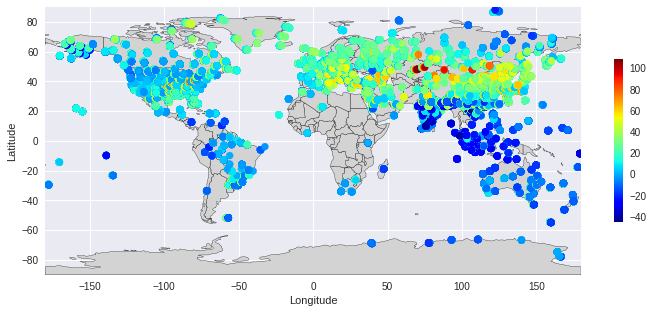

In [13]:
param = "obs"
gd.plot_diag.plot(gdf_list[tidx],varName=varName,varType=varType,param=param,mask='iuse == 1',legend='true')

Para salvar a figura, execute os comandos a seguir:

In [14]:
figname=varName+"_"+param+"_"+"plot.png"
plt.tight_layout()
plt.savefig(figname)
plt.close()

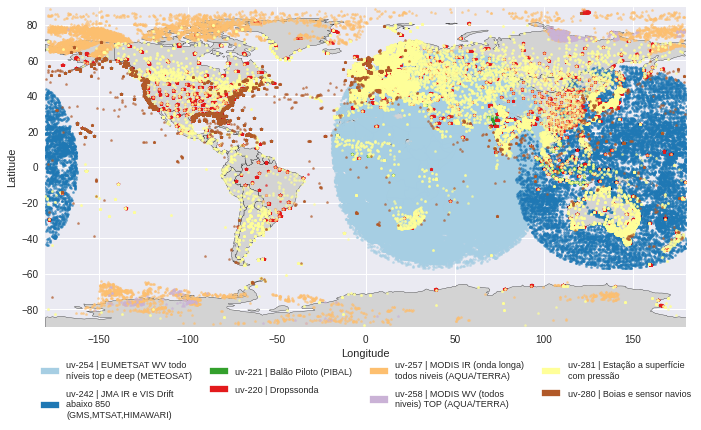

In [15]:
varTypes = [254,242,221,220,257,258,281,280]
idschar="_".join([str(item) for item in varTypes])
gd.plot_diag.ptmap(gdf_list[tidx],varName=varName,varType=varTypes)
figname=varName+"_"+idschar+"_"+"ptmap.png"
plt.tight_layout()
plt.savefig(figname)

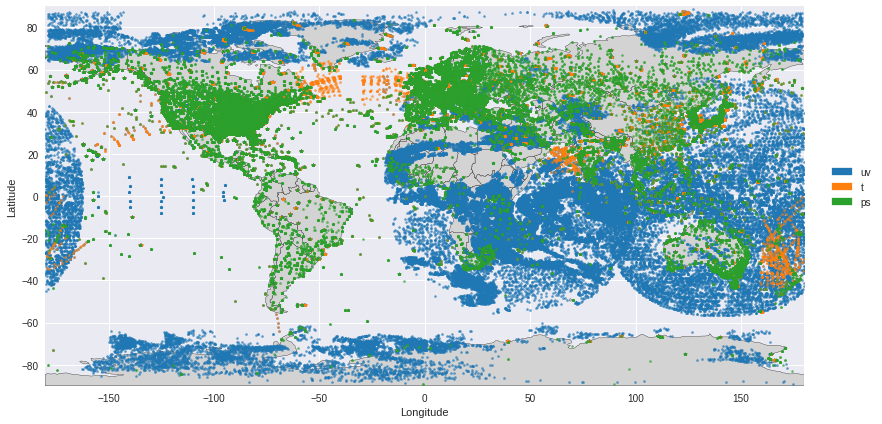

In [16]:
varNames=['uv','ps','t']
idschar="_".join([str(item) for item in varNames])
gd.plot_diag.pvmap(gdf_list[tidx],varName=varNames,mask='iuse==1')
figname=idschar+"_pvmap.png"
plt.tight_layout()
plt.savefig(figname)

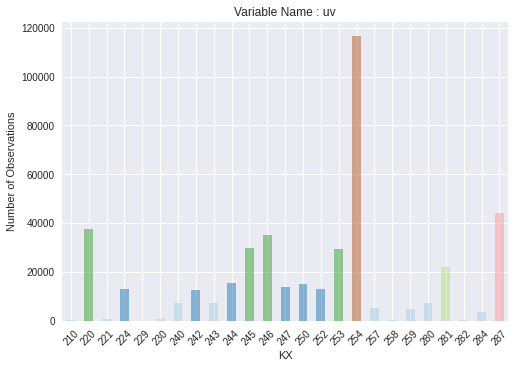

In [17]:
gd.plot_diag.pcount(gdf_list[tidx],varName)

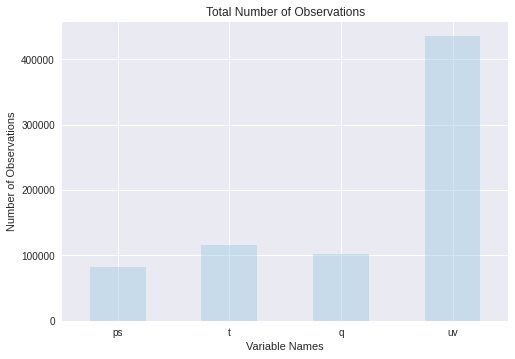

In [18]:
gd.plot_diag.vcount(gdf_list[tidx])

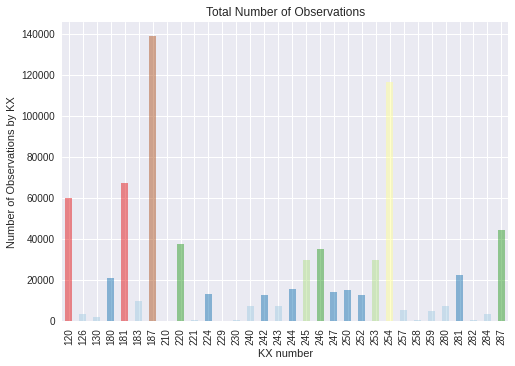

In [19]:
gd.plot_diag.kxcount(gdf_list[tidx])

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função time_series, incluída na classe plot_diag. Inicialmente é gerada uma figura com os parâmetros já fixados acima. Em seguida são apresentadas figuras alterando os parâmetros _Level_, _Lay_ e _SingleL_.


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

 Preparing data for: 2019-12-10:00  - Level:  1000
 Preparing data for: 2019-12-10:06  - Level:  1000
 Preparing data for: 2019-12-10:12  - Level:  1000
 Preparing data for: 2019-12-10:18  - Level:  1000
 Preparing data for: 2019-12-11:00  - Level:  1000
 Preparing data for: 2019-12-11:06  - Level:  1000
 Preparing data for: 2019-12-11:12  - Level:  1000
 Preparing data for: 2019-12-11:18  - Level:  1000


 Calculating for 2019-12-10:00
 Calculating for 2019-12-10:06
 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



<Figure size 432x288 with 0 Axes>

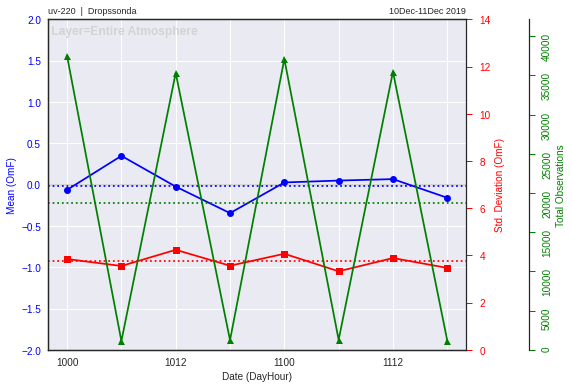

<Figure size 432x288 with 0 Axes>

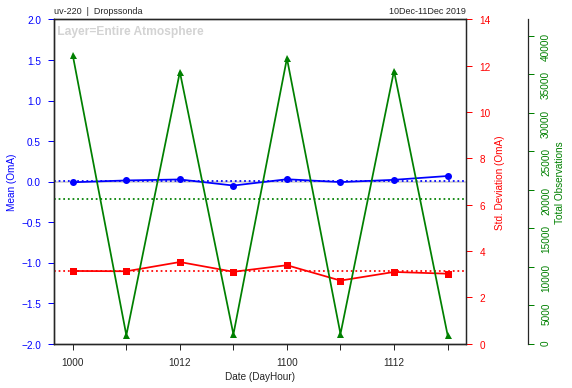

<Figure size 432x288 with 0 Axes>

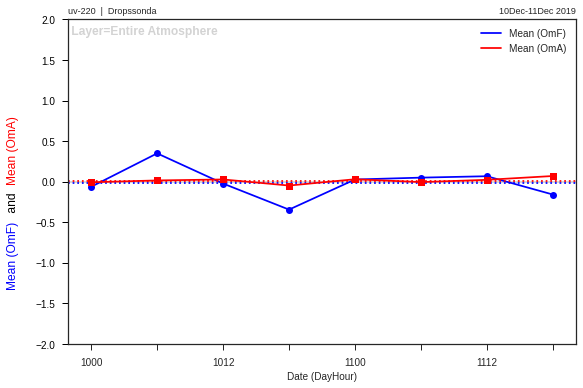

<Figure size 432x288 with 0 Axes>

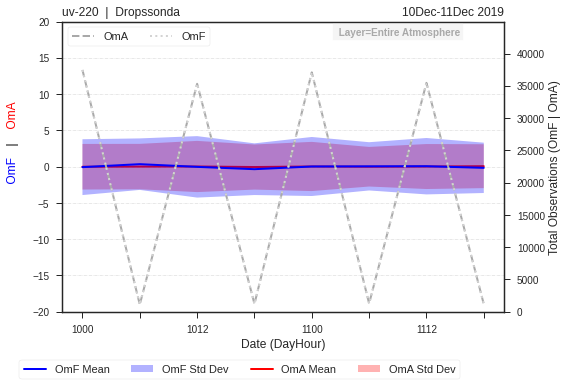

In [20]:
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

No caso anterior, Level estava fixo em 1000 hPa com SingleL igual a "All", ou seja, toda a atmosfera foi considerada como uma única camada e o valor 1000hPa funciona apenas como uma flag para indicar que não existe variação em altura. Ainda com Level = 1000, pode-se usar SingleL = "OneL" para uma única camada em torno do valor de Level, neste caso 1000 hPa, variando entre Level-Lay e Level+Lay (Na definição de variáveis Lay foi fixado com 15 hPa, no caso de ser None, o valor padrão de 50 hPa é utilizado.)


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

 Preparing data for: 2019-12-10:00  - Level:  1000
 Preparing data for: 2019-12-10:06  - Level:  1000
 Preparing data for: 2019-12-10:12  - Level:  1000
 Preparing data for: 2019-12-10:18  - Level:  1000
 Preparing data for: 2019-12-11:00  - Level:  1000
 Preparing data for: 2019-12-11:06  - Level:  1000
 Preparing data for: 2019-12-11:12  - Level:  1000
 Preparing data for: 2019-12-11:18  - Level:  1000


 Calculating for 2019-12-10:00
 Calculating for 2019-12-10:06
 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



<Figure size 432x288 with 0 Axes>

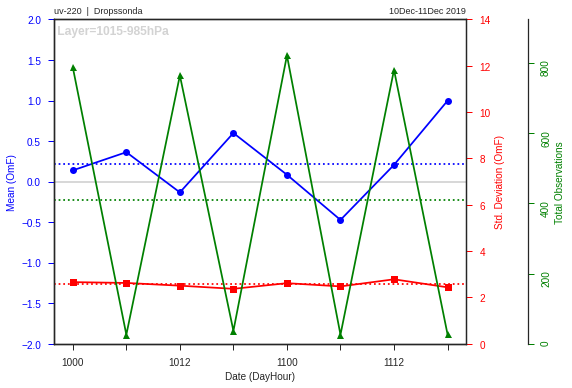

<Figure size 432x288 with 0 Axes>

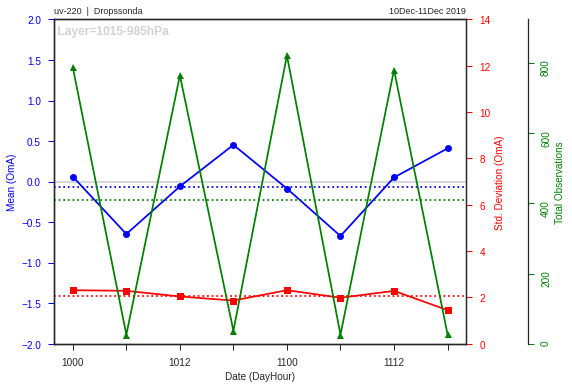

<Figure size 432x288 with 0 Axes>

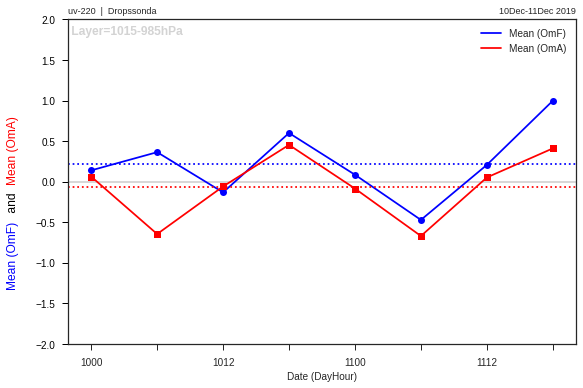

<Figure size 432x288 with 0 Axes>

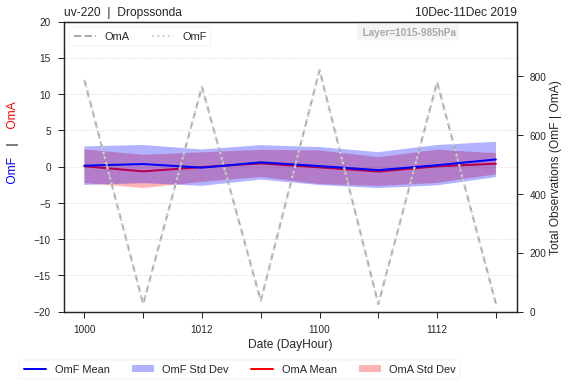

In [21]:
SingleL = "OneL"
Lay = 15
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

Observe como no exemplo acima a quantidade de dados diminui, uma vez que agora está sendo utilizada uma camada entre 1015 e 985 hPa.

Agora vamos alterar para não fixar em um único nível ou camada, ou seja, altear a variável Level para None ou "Zlevs". A opção None busca os dados em cada nível existente nos arquivos e faz a figura para todos esses níveis, porém os valores no eixo Y são apenas dos níveis padrões. é importante esclarecer que os chamados níveis padrões estão definidos na função read_diag e podem ser acessados com:

In [22]:
gdf_list[tidx].zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

Estes são os níveis utilizados quando opta-se por Level = "Zlevs".


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

 Preparing data for: 2019-12-10:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]


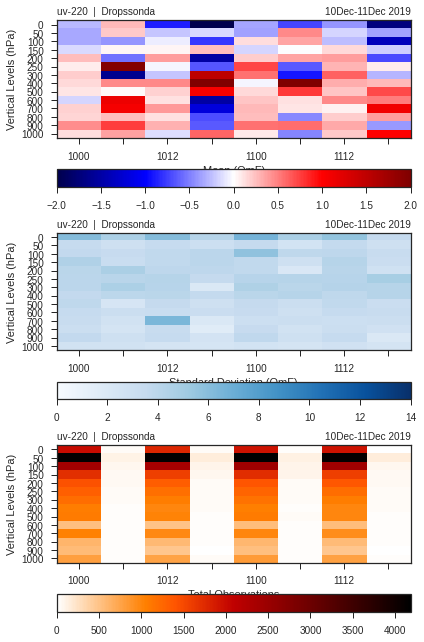

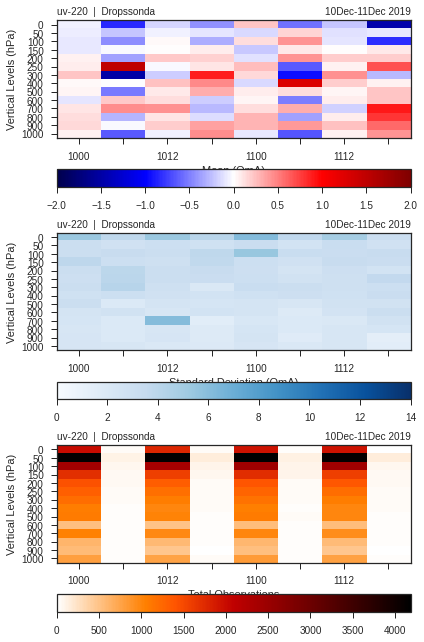

In [23]:
Level = "Zlevs"
Lay = 15
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

Se Lay = None, então as camadas são preenchidas variando entre o valor médio considerando as camadas inferiores e superiores. Por exemplo, para o nível de 700 hPa é construída uma camada entre 750 e 650 hPa, uma vez que os níveis inferiores e superiores são 800 e 600 hPa, respectivamente. Para o nível de 1000 hPa a camada varia entre 1050 e 950 hPa.


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

 Preparing data for: 2019-12-10:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-10:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2019-12-11:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]


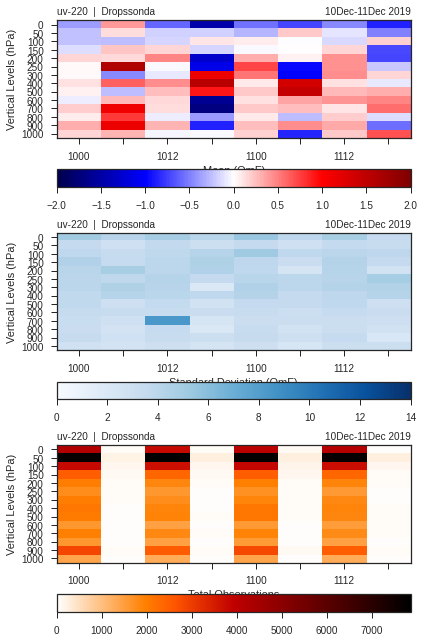

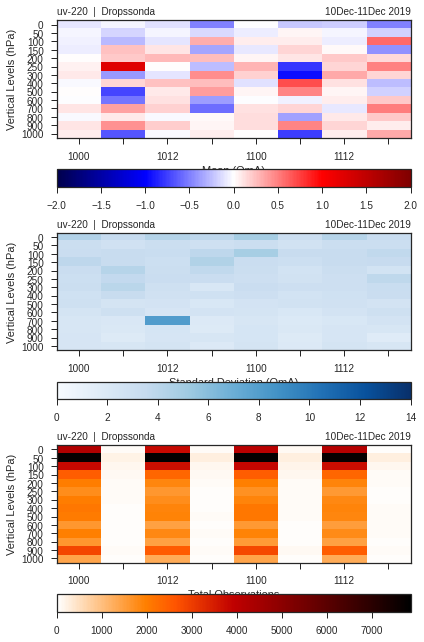

In [24]:
Level = "Zlevs"
Lay = None
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

Finalmente, existe a opção de considerar todos os níveis, ou seja, Level = None. Esta opção traz certa dificuldade na visualização da informação na figura por conta da grande quatidade de níveis e distribuição dos dados em todos os níveis.


 Analyzing data of variable: uv  ||  type: 220  ||  Dropssonda  ||  check: OmF

 Preparing data for: 2019-12-10:00
 Levels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 1

 Calculating for 2019-12-10:12
 Calculating for 2019-12-10:18
 Calculating for 2019-12-11:00
 Calculating for 2019-12-11:06
 Calculating for 2019-12-11:12
 Calculating for 2019-12-11:18


 Making Graphics...
 Done!



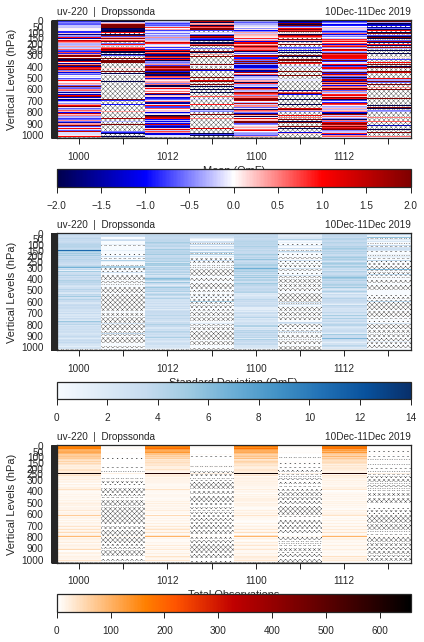

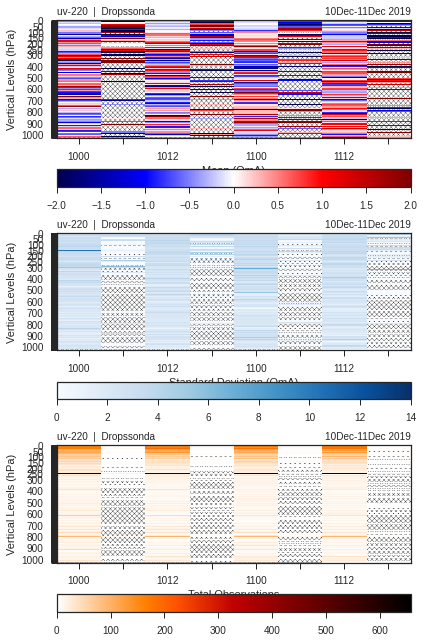

In [25]:
Level = None
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

O **_GSIDIAG_** é um pacote em desenvolvimento e com constante atualização. Desta forma, este documento pode ser alterado e adicionadas novas funcionalidades com o decorrer do desenvolvimento do pacote.